# Biodiversity in National Parks Project

### At this project i will search at datas from National Parks Service wich species they have and wich one is most endangered through each park do we have at the data



In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

observation = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')


In [4]:
#first we will check the columns names
print(observation.columns)
print(species.columns, '\n')

print(species.conservation_status.unique())
print(observation.park_name.unique(), '\n')

#lets merge the 2 df to better see how are the relationship btw variables
df = pd.merge(observation, species, on='scientific_name')
# print(df.columns)


Index(['scientific_name', 'park_name', 'observations'], dtype='object')
Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object') 

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park'] 



### Here we can see that we have the most population are Vascular Plants at the parks

We have 5541 species
['Vascular Plant' 'Mammal' 'Bird' 'Nonvascular Plant' 'Amphibian'
 'Reptile' 'Fish']


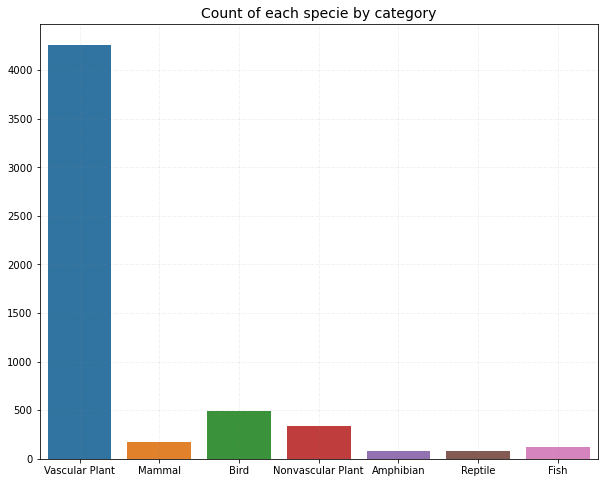

<Figure size 432x288 with 0 Axes>

In [6]:
species_sum = species['scientific_name'].nunique()
print('We have {} species'.format(species_sum))

categories = df.category.unique()
print(categories)

vascular_sum = df.scientific_name[df.category == 'Vascular Plant'].nunique()
mammal_sum = df.scientific_name[df.category == 'Mammal'].nunique()
bird_sum = df.scientific_name[df.category == 'Bird'].nunique()
nonvascular_sum = df.scientific_name[df.category == 'Nonvascular Plant'].nunique()
amphibian_sum = df.scientific_name[df.category == 'Amphibian'].nunique()
reptile_sum = df.scientific_name[df.category == 'Reptile'].nunique()
fish_sum = df.scientific_name[df.category == 'Fish'].nunique()

category_sum_list = [vascular_sum, mammal_sum, bird_sum, nonvascular_sum, amphibian_sum, reptile_sum, fish_sum]

# print(vascular_sum)
# print(mammal_sum)
# print(bird_sum)

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=df.category.unique(), y=category_sum_list)
plt.title('Count of each specie by category', fontsize=14)
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)

plt.show()
plt.clf()

# as we can see the 3 species do we have more are: Vascular Plant, Nonvascular Plant and Bird

### We have the modal individual at each category from the parks

In [7]:
# wich specie is the modal one to each category do we have?

def mode_lst(category):
    mode = df.scientific_name[df.category == category].dropna().mode().reset_index()
    print('The {} mode is:'.format(category), '\n', mode[0:1], '\n')
    
for i in categories:
    mode_lst(i) 


The Vascular Plant mode is: 
    index               0
0      0  Holcus lanatus 

The Mammal mode is: 
    index            0
0      0  Canis lupus 

The Bird mode is: 
    index              0
0      0  Columba livia 

The Nonvascular Plant mode is: 
    index                     0
0      0  Abietinella abietina 

The Amphibian mode is: 
    index                 0
0      0  Rana catesbeiana 

The Reptile mode is: 
    index               0
0      0  Charina bottae 

The Fish mode is: 
    index                    0
0      0  Oncorhynchus mykiss 



### I did a pie chart to see how was the conservation status through the species from the parks

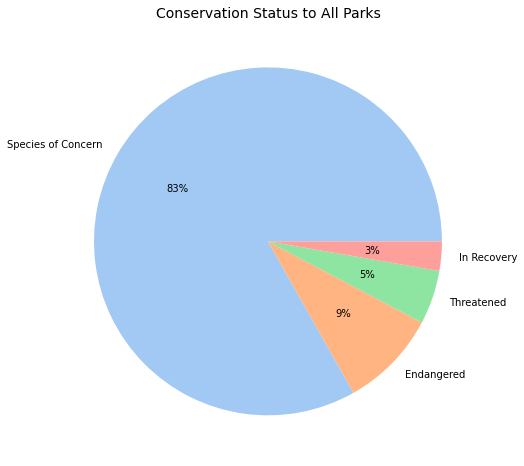

<Figure size 432x288 with 0 Axes>

In [8]:
# how is the conservation status for all parks that we have here?
colors = sns.color_palette('pastel')[0:5]

concern_sum = df[df.conservation_status == 'Species of Concern'].value_counts().sum()
endangered_sum = df[df.conservation_status == 'Endangered'].value_counts().sum()
threatened_sum = df[df.conservation_status == 'Threatened'].value_counts().sum()
recovery_sum = df[df.conservation_status == 'In Recovery'].value_counts().sum()

conservation_list = [concern_sum, endangered_sum, threatened_sum, recovery_sum]
labels = ['Species of Concern', 'Endangered', 'Threatened', 'In Recovery']

fig, ax = plt.subplots(figsize=(10, 8))
plt.pie(conservation_list, labels = labels, colors = colors, autopct='%.0f%%' )
plt.title('Conservation Status to All Parks', fontsize=14)
plt.show()
plt.clf()

### Here we can put the name of each category do we want and discover the scientific name of the species to concern and endangered species

In [9]:
#what are the species of concern and endangered?
def species_to_concern(category):
    species_concern = df.scientific_name[(df.conservation_status == 'Species of Concern') & (df.category == category)].unique()
    print('{} species of concern are:'.format(category), '\n', species_concern, '\n')

species_to_concern('Mammal')

def species_endangered(category):
    species_concern = df.scientific_name[(df.conservation_status == 'Endangered') & (df.category == category)].unique()
    print('{} species Endangered are:'.format(category), '\n', species_concern, '\n')

species_endangered('Mammal')


Mammal species of concern are: 
 ['Lasiurus blossevillii' 'Myotis californicus' 'Taxidea taxus'
 'Myotis lucifugus' 'Eptesicus fuscus' 'Antrozous pallidus'
 'Myotis evotis' 'Sylvilagus bachmani' 'Lepus americanus tahoensis'
 'Myotis yumanensis' 'Euderma maculatum' 'Bassariscus astutus'
 'Myotis thysanodes' 'Myotis keenii' 'Aplodontia rufa californica'
 'Canis latrans' 'Myotis volans' 'Ovis canadensis'
 'Lasionycteris noctivagans' 'Myotis austroriparius' 'Myotis leibii'
 'Sorex preblei'] 

Mammal species Endangered are: 
 ['Canis rufus' 'Canis lupus' 'Myotis grisescens' 'Ovis canadensis sierrae'
 'Glaucomys sabrinus coloratus' 'Myotis sodalis'] 



### With this function below we can input the name of each park and category that we want to analyse and see how many endangered species do we have at each park.
- the function will plot a bar graph too better visualization

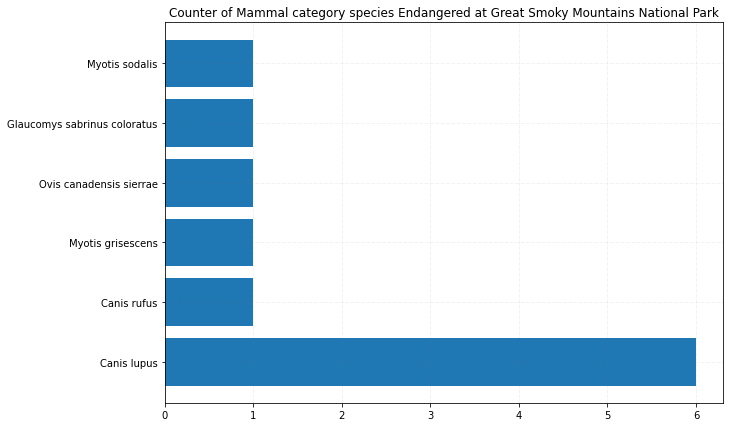

The sum of each specie of Mammal Endangered at Great Smoky Mountains National Park are: 
 Canis lupus                     6
Canis rufus                     1
Myotis grisescens               1
Ovis canadensis sierrae         1
Glaucomys sabrinus coloratus    1
Myotis sodalis                  1
Name: scientific_name, dtype: int64 



In [68]:
#now lets see how much of this endangered species do we have at each park

def func(park_name, category_name):
    
    specie_park_endangered = df.scientific_name[(df.conservation_status == 'Endangered') & (df.park_name == park_name) & (df.category == category_name)]
    # specie_park_endangered_sum = df.scientific_name[(df.conservation_status == 'Endangered') & (df.park_name == park_name) & (df.category == category_name)].value_counts().sum()

    empty_list = []
    for i in specie_park_endangered:
        empty_list.append(i)
    
    individual_counter = specie_park_endangered.value_counts()
    empty_dict = individual_counter.to_dict()
    endangered_df = pd.DataFrame(empty_dict.items(), columns=['Name', 'Count'])
        
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.barh(endangered_df.Name, endangered_df.Count)
    ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)
    ax.set_title('Counter of {} category species Endangered at {}'.format(category_name, park_name))
    plt.show()
    
    
    # print('The {} Species Endangered at {} are:'.format(category_name, park_name), '\n',specie_park_endangered, '\n')
    print('The sum of each specie of {} Endangered at {} are:'.format(category_name, park_name), '\n', specie_park_endangered.value_counts(), '\n')
    # print(empty_dict)

func('Great Smoky Mountains National Park', 'Mammal')


### So with this study we can keeping eyes on the most Endagered species at each park from the National Parks Service